In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
sns.set(context='notebook')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.tight_layout()
import pickle
import warnings
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
from sklearn.metrics import precision_recall_curve, auc 
warnings.filterwarnings("ignore")
#import scorecardpy as sc
import plotly.graph_objects as go
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from statsmodels.tools import add_constant
import statsmodels.api as sm

In [2]:
df = pd.read_csv('C:\\Users\\DELL\\Downloads\\Auto Loan Scorecard\\accepts.csv')

# Variable creation

In [3]:
df['DTI']= (df['tot_rev_debt']/df['tot_income']*100)
df['LTI']= (df['loan_amt']/df['tot_income'])*100
df

,bankruptcy,app_id,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,...,purpose,loan_term,loan_amt,ltv,tot_income,used_ind,bad,weight,DTI,LTI
0,0,1001,6.0,7.0,46.0,NaN,NaN,NaN,NaN,0,...,LEASE,36.0,18730.85,109,4800.00,0,0,4.75,NaN,390.226042
1,0,1002,0.0,21.0,153.0,6.0,1.0,97.0,4637.0,2,...,LEASE,60.0,27112.96,97,5833.33,0,0,4.75,1.662858,464.793866
2,0,1003,0.0,29.0,194.0,4.0,2.0,4798.0,22791.0,21,...,LEASE,48.0,25740.01,105,2308.33,0,0,4.75,207.855896,1115.092296
3,0,1005,2.0,20.0,129.0,8.0,6.0,5807.0,15763.0,37,...,LEASE,63.0,14298.82,78,4083.33,1,1,1.00,142.212361,350.175470
4,1,1006,2.0,10.0,108.0,6.0,4.0,3352.0,4079.0,82,...,LEASE,60.0,22167.51,100,5783.33,0,0,4.75,57.959688,383.300106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,0,11072,0.0,22.0,152.0,NaN,2.0,5072.0,24493.0,21,...,LOAN,60.0,21260.25,87,2500.00,1,0,4.75,202.880000,850.410000
5833,0,11075,0.0,10.0,71.0,NaN,NaN,NaN,NaN,0,...,LOAN,66.0,19814.44,92,950.00,1,1,1.00,NaN,2085.730526
5834,0,11076,0.0,39.0,144.0,9.0,1.0,5528.0,15012.0,37,...,LOAN,72.0,31397.02,110,3000.00,0,0,4.75,184.266667,1046.567333
5835,0,11078,1.0,16.0,98.0,4.0,2.0,9587.0,6900.0,100,...,LEASE,60.0,21783.66,104,1948.76,0,1,1.00,491.953858,1117.821589


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bankruptcy     5837 non-null   int64  
 1   app_id         5837 non-null   int64  
 2   tot_derog      5624 non-null   float64
 3   tot_tr         5624 non-null   float64
 4   age_oldest_tr  5621 non-null   float64
 5   tot_open_tr    4421 non-null   float64
 6   tot_rev_tr     5201 non-null   float64
 7   tot_rev_debt   5360 non-null   float64
 8   tot_rev_line   5360 non-null   float64
 9   rev_util       5837 non-null   int64  
 10  bureau_score   5522 non-null   float64
 11  purch_price    5837 non-null   float64
 12  msrp           5836 non-null   float64
 13  down_pyt       5837 non-null   float64
 14  purpose        5837 non-null   object 
 15  loan_term      5836 non-null   float64
 16  loan_amt       5837 non-null   float64
 17  ltv            5837 non-null   int64  
 18  tot_inco

In [5]:
df.isnull().sum()

bankruptcy          0
app_id              0
tot_derog         213
tot_tr            213
age_oldest_tr     216
tot_open_tr      1416
tot_rev_tr        636
tot_rev_debt      477
tot_rev_line      477
rev_util            0
bureau_score      315
purch_price         0
msrp                1
down_pyt            0
purpose             0
loan_term           1
loan_amt            0
ltv                 0
tot_income          5
used_ind            0
bad                 0
weight              0
DTI               490
LTI                 5
dtype: int64

In [6]:
df['DTI'].replace([np.inf,-np.inf],np.nan,inplace=True)

In [7]:
df['DTI'].isnull().sum()

585

In [8]:
df['LTI'].replace([np.inf,-np.inf],np.nan,inplace=True)

In [9]:
df.describe()

,bankruptcy,app_id,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,...,down_pyt,loan_term,loan_amt,ltv,tot_income,used_ind,bad,weight,DTI,LTI
count,5837.000000,5837.000000,5624.000000,5624.000000,5621.000000,4421.000000,5201.000000,5360.000000,5360.000000,5837.000000,...,5837.000000,5836.000000,5837.000000,5837.000000,5.832000e+03,5837.000000,5837.000000,5837.000000,5252.000000,5718.000000
mean,0.076752,5928.902004,1.912696,17.087304,154.278598,5.721782,3.093444,6218.970522,18261.799627,37.975158,...,1815.228131,56.140164,18188.268705,98.837074,6.209878e+03,0.565016,0.204900,3.981626,219.779681,684.134515
std,0.266220,2931.998721,3.276356,10.818537,99.991165,3.165988,2.401946,8659.777458,20950.434124,34.279111,...,2946.797107,9.989603,9049.544879,18.210172,1.073921e+05,0.495797,0.403663,1.513736,3312.800407,5842.704561
min,0.000000,1001.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,12.000000,25.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.196698
25%,0.000000,3353.000000,0.000000,9.000000,77.000000,3.000000,1.000000,790.000000,3228.750000,5.000000,...,0.000000,48.000000,11673.260000,90.000000,2.219665e+03,0.000000,0.000000,4.750000,23.271831,299.360793
50%,0.000000,5943.000000,0.000000,16.000000,137.000000,5.000000,3.000000,3009.500000,10573.000000,30.000000,...,989.000000,60.000000,16878.500000,100.000000,3.400000e+03,1.000000,0.000000,4.750000,80.805737,482.166750
75%,0.000000,8465.000000,2.000000,24.000000,205.000000,7.000000,4.000000,8461.250000,26194.000000,66.000000,...,2326.840000,60.000000,23404.250000,109.000000,5.156250e+03,1.000000,0.000000,4.750000,212.265868,735.246205
max,1.000000,11079.000000,32.000000,77.000000,588.000000,26.000000,24.000000,96260.000000,205395.000000,100.000000,...,35000.000000,72.000000,111650.000000,176.000000,8.147167e+06,1.000000,1.000000,4.750000,236974.595843,387550.346420


In [10]:
df1 = df.copy()
df1

,bankruptcy,app_id,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,...,purpose,loan_term,loan_amt,ltv,tot_income,used_ind,bad,weight,DTI,LTI
0,0,1001,6.0,7.0,46.0,NaN,NaN,NaN,NaN,0,...,LEASE,36.0,18730.85,109,4800.00,0,0,4.75,NaN,390.226042
1,0,1002,0.0,21.0,153.0,6.0,1.0,97.0,4637.0,2,...,LEASE,60.0,27112.96,97,5833.33,0,0,4.75,1.662858,464.793866
2,0,1003,0.0,29.0,194.0,4.0,2.0,4798.0,22791.0,21,...,LEASE,48.0,25740.01,105,2308.33,0,0,4.75,207.855896,1115.092296
3,0,1005,2.0,20.0,129.0,8.0,6.0,5807.0,15763.0,37,...,LEASE,63.0,14298.82,78,4083.33,1,1,1.00,142.212361,350.175470
4,1,1006,2.0,10.0,108.0,6.0,4.0,3352.0,4079.0,82,...,LEASE,60.0,22167.51,100,5783.33,0,0,4.75,57.959688,383.300106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,0,11072,0.0,22.0,152.0,NaN,2.0,5072.0,24493.0,21,...,LOAN,60.0,21260.25,87,2500.00,1,0,4.75,202.880000,850.410000
5833,0,11075,0.0,10.0,71.0,NaN,NaN,NaN,NaN,0,...,LOAN,66.0,19814.44,92,950.00,1,1,1.00,NaN,2085.730526
5834,0,11076,0.0,39.0,144.0,9.0,1.0,5528.0,15012.0,37,...,LOAN,72.0,31397.02,110,3000.00,0,0,4.75,184.266667,1046.567333
5835,0,11078,1.0,16.0,98.0,4.0,2.0,9587.0,6900.0,100,...,LEASE,60.0,21783.66,104,1948.76,0,1,1.00,491.953858,1117.821589


In [11]:
target_variable = df1['bad']

In [12]:
independent_variable = df.drop(columns=['app_id','bad','purpose','used_ind','bankruptcy','weight','LTI'])

# basic filters

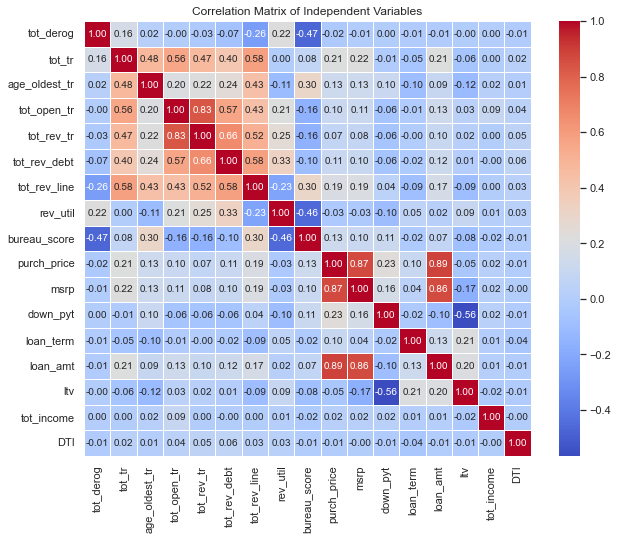

In [13]:
# Calculate the correlation matrix
correlation_matrix = independent_variable.corr()

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

# CONTINUOUS VARIABLE WOE

In [14]:
def calc_woe_iv(df, feature, target, bins=15):
    # Create bins including a bin for missing values
    df['bin'] = pd.qcut(df[feature], bins, duplicates='drop')
    df['bin'] = df['bin'].cat.add_categories(['Missing'])
    df['bin'].fillna('Missing', inplace=True)
    
    # Calculate the number of events and non-events in each bin
    bin_summary = df.groupby('bin').agg(
        total=(target, 'count'),
        bads=(target, 'sum')
    )
    bin_summary['goods'] = bin_summary['total'] - bin_summary['bads']
    
    # Calculate distribution of events and non-events
    total_bads = bin_summary['bads'].sum()
    total_goods = bin_summary['goods'].sum()
    bin_summary['bad_dist'] = bin_summary['bads'] / total_bads
    bin_summary['good_dist'] = bin_summary['goods'] / total_goods
    
    # Replace 0 values to avoid division by zero or log(0) issues
    bin_summary.replace({'bad_dist': {0: 1e-6}, 'good_dist': {0: 1e-6}}, inplace=True)
    
    # Calculate WOE
    bin_summary['woe'] = np.log(bin_summary['good_dist'] / bin_summary['bad_dist'])
    
    # Calculate IV
    bin_summary['iv'] = (bin_summary['good_dist'] - bin_summary['bad_dist']) * bin_summary['woe']
    iv = bin_summary['iv'].sum()

    # Calculate difference in WOE
    bin_summary['diff_woe'] = bin_summary['woe'].diff().abs()
    
    # Merge the 'Missing' bin with the closest WoE bin
    if 'Missing' in bin_summary.index:
        # Get WoE of the missing bin
        missing_woe = bin_summary.loc['Missing', 'woe']
        
        # Calculate the absolute difference in WoE between the missing bin and other bins
        bin_summary['woe_diff'] = (bin_summary['woe'] - missing_woe).abs()
        
        # Find the bin with the minimum WoE difference
        closest_bin = bin_summary[bin_summary.index != 'Missing']['woe_diff'].idxmin()
        
        # Merge the 'Missing' bin with the closest bin
        bin_summary.loc[closest_bin, ['total', 'bads', 'goods']] += bin_summary.loc['Missing', ['total', 'bads', 'goods']]
        
        # Drop the 'Missing' bin
        bin_summary.drop('Missing', inplace=True)
        bin_summary.drop('woe_diff', axis=1, inplace=True)
    
        # Recalculate distributions and WoE for all bins
        total_bads = bin_summary['bads'].sum()
        total_goods = bin_summary['goods'].sum()
        bin_summary['bad_dist'] = bin_summary['bads'] / total_bads
        bin_summary['good_dist'] = bin_summary['goods'] / total_goods
        bin_summary['woe'] = np.log(bin_summary['good_dist'] / bin_summary['bad_dist'])
        bin_summary['iv'] = (bin_summary['good_dist'] - bin_summary['bad_dist']) * bin_summary['woe']
    
        # Update bin name to reflect the merge
        new_index = bin_summary.index.to_list()
        new_index[new_index.index(closest_bin)] = f'{closest_bin} + Missing'
        bin_summary.index = new_index
    
        # Update the diff_woe column for the merged bin
        bin_summary['diff_woe'] = bin_summary['woe'].diff().abs()
    
    plt.figure(figsize=(8, 4))
    plt.plot(bin_summary.index.astype(str), bin_summary['woe'], linestyle='-', marker='o', color='darkblue')
    plt.xlabel('Bins')
    plt.ylabel('Weight of Evidence (WOE)')
    plt.title(f'WOE of {feature}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
    
    total_row = pd.DataFrame(bin_summary.sum()).T
    total_row.index = ['Total']
    bin_summary = pd.concat([bin_summary, total_row])
    
    return bin_summary



WOE and IV values for tot_derog:


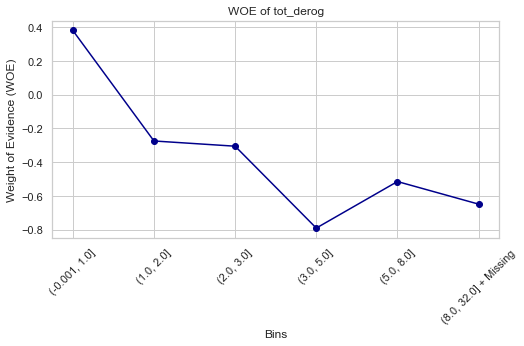

                        total    bads   goods  bad_dist  good_dist       woe  \
(-0.001, 1.0]          3741.0   560.0  3181.0  0.468227   0.685413  0.381067   
(1.0, 2.0]              478.0   121.0   357.0  0.101171   0.076923 -0.274002   
(2.0, 3.0]              332.0    86.0   246.0  0.071906   0.053006 -0.304963   
(3.0, 5.0]              439.0   159.0   280.0  0.132943   0.060332 -0.790062   
(5.0, 8.0]              332.0   100.0   232.0  0.083612   0.049989 -0.514380   
(8.0, 32.0] + Missing   515.0   170.0   345.0  0.142140   0.074337 -0.648201   
Total                  5837.0  1196.0  4641.0  1.000000   1.000000 -2.150541   

                             iv  diff_woe  
(-0.001, 1.0]          0.082762       NaN  
(1.0, 2.0]             0.006644  0.655069  
(2.0, 3.0]             0.005764  0.030961  
(3.0, 5.0]             0.057367  0.485099  
(5.0, 8.0]             0.017295  0.275682  
(8.0, 32.0] + Missing  0.043950  0.133821  
Total                  0.213782  1.580632  

WOE an

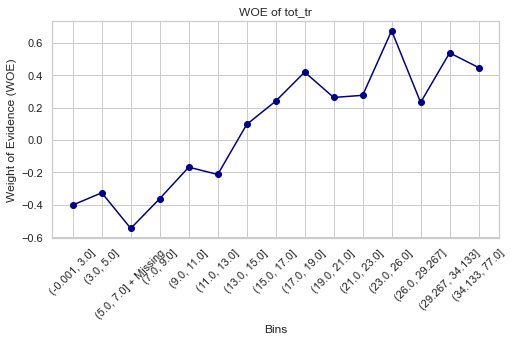

                       total    bads   goods  bad_dist  good_dist       woe  \
(-0.001, 3.0]          457.0   127.0   330.0  0.106187   0.071105 -0.401042   
(3.0, 5.0]             327.0    86.0   241.0  0.071906   0.051928 -0.325498   
(5.0, 7.0] + Missing   588.0   181.0   407.0  0.151338   0.087697 -0.545631   
(7.0, 9.0]             374.0   101.0   273.0  0.084448   0.058824 -0.361596   
(9.0, 11.0]            454.0   106.0   348.0  0.088629   0.074984 -0.167184   
(11.0, 13.0]           389.0    94.0   295.0  0.078595   0.063564 -0.212267   
(13.0, 15.0]           422.0    80.0   342.0  0.066890   0.073691  0.096837   
(15.0, 17.0]           374.0    63.0   311.0  0.052676   0.067011  0.240711   
(17.0, 19.0]           373.0    54.0   319.0  0.045151   0.068735  0.420260   
(19.0, 21.0]           357.0    59.0   298.0  0.049331   0.064210  0.263609   
(21.0, 23.0]           312.0    51.0   261.0  0.042642   0.056238  0.276748   
(23.0, 26.0]           371.0    43.0   328.0  0.0359

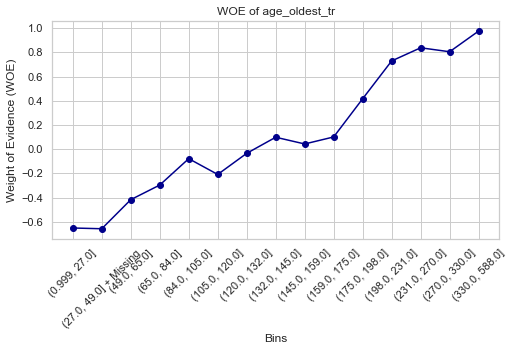

                         total    bads   goods  bad_dist  good_dist       woe  \
(0.999, 27.0]            396.0   131.0   265.0  0.109532   0.057100 -0.651415   
(27.0, 49.0] + Missing   575.0   191.0   384.0  0.159699   0.082741 -0.657578   
(49.0, 65.0]             377.0   106.0   271.0  0.088629   0.058393 -0.417267   
(65.0, 84.0]             373.0    96.0   277.0  0.080268   0.059685 -0.296278   
(84.0, 105.0]            390.0    85.0   305.0  0.071070   0.065719 -0.078287   
(105.0, 120.0]           361.0    87.0   274.0  0.072742   0.059039 -0.208727   
(120.0, 132.0]           399.0    84.0   315.0  0.070234   0.067873 -0.034191   
(132.0, 145.0]           354.0    67.0   287.0  0.056020   0.061840  0.098842   
(145.0, 159.0]           389.0    77.0   312.0  0.064381   0.067227  0.043251   
(159.0, 175.0]           360.0    68.0   292.0  0.056856   0.062917  0.101299   
(175.0, 198.0]           372.0    54.0   318.0  0.045151   0.068520  0.417120   
(198.0, 231.0]           371

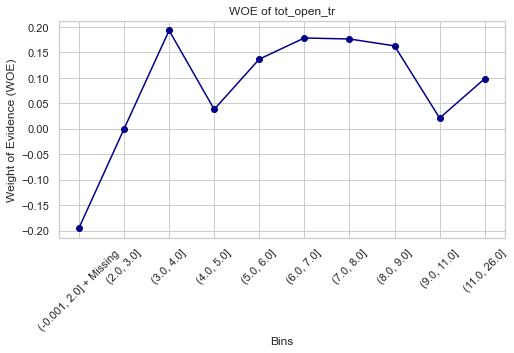

                          total    bads   goods  bad_dist  good_dist  \
(-0.001, 2.0] + Missing  1941.0   463.0  1478.0  0.387124   0.318466   
(2.0, 3.0]                605.0   124.0   481.0  0.103679   0.103641   
(3.0, 4.0]                685.0   120.0   565.0  0.100334   0.121741   
(4.0, 5.0]                634.0   126.0   508.0  0.105351   0.109459   
(5.0, 6.0]                545.0   100.0   445.0  0.083612   0.095885   
(6.0, 7.0]                406.0    72.0   334.0  0.060201   0.071967   
(7.0, 8.0]                304.0    54.0   250.0  0.045151   0.053868   
(8.0, 9.0]                206.0    37.0   169.0  0.030936   0.036415   
(9.0, 11.0]               268.0    54.0   214.0  0.045151   0.046111   
(11.0, 26.0]              243.0    46.0   197.0  0.038462   0.042448   
Total                    5837.0  1196.0  4641.0  1.000000   1.000000   

                              woe            iv  diff_woe  
(-0.001, 2.0] + Missing -0.195229  1.340402e-02       NaN  
(2.0, 3.0]     

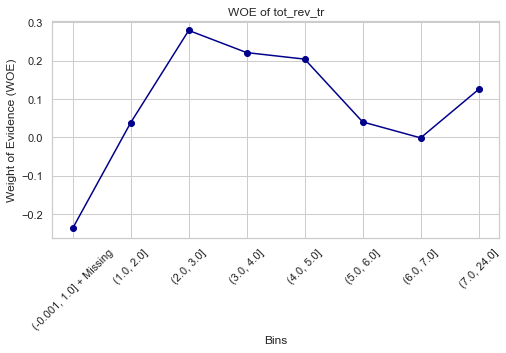

                          total    bads   goods  bad_dist  good_dist  \
(-0.001, 1.0] + Missing  2097.0   516.0  1581.0  0.431438   0.340659   
(1.0, 2.0]               1077.0   214.0   863.0  0.178930   0.185951   
(2.0, 3.0]                925.0   151.0   774.0  0.126254   0.166774   
(3.0, 4.0]                613.0   105.0   508.0  0.087793   0.109459   
(4.0, 5.0]                426.0    74.0   352.0  0.061873   0.075846   
(5.0, 6.0]                257.0    51.0   206.0  0.042642   0.044387   
(6.0, 7.0]                156.0    32.0   124.0  0.026756   0.026718   
(7.0, 24.0]               286.0    53.0   233.0  0.044314   0.050205   
Total                    5837.0  1196.0  4641.0  1.000000   1.000000   

                              woe            iv  diff_woe  
(-0.001, 1.0] + Missing -0.236241  2.144568e-02       NaN  
(1.0, 2.0]               0.038491  2.702693e-04  0.274733  
(2.0, 3.0]               0.278345  1.127859e-02  0.239853  
(3.0, 4.0]               0.220574  4.77

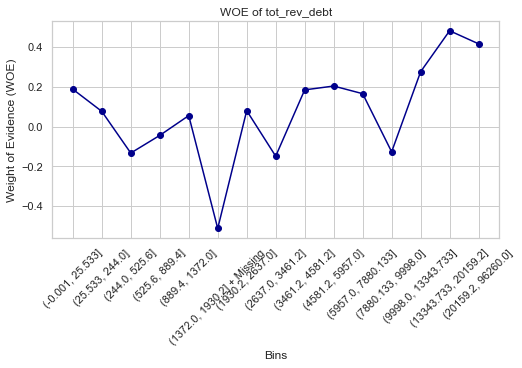

                             total    bads   goods  bad_dist  good_dist  \
(-0.001, 25.533]             358.0    63.0   295.0  0.052676   0.063564   
(25.533, 244.0]              358.0    69.0   289.0  0.057692   0.062271   
(244.0, 525.6]               356.0    81.0   275.0  0.067726   0.059254   
(525.6, 889.4]               358.0    76.0   282.0  0.063545   0.060763   
(889.4, 1372.0]              357.0    70.0   287.0  0.058528   0.061840   
(1372.0, 1930.2] + Missing   834.0   251.0   583.0  0.209866   0.125619   
(1930.2, 2637.0]             359.0    69.0   290.0  0.057692   0.062487   
(2637.0, 3461.2]             356.0    82.0   274.0  0.068562   0.059039   
(3461.2, 4581.2]             357.0    63.0   294.0  0.052676   0.063348   
(4581.2, 5957.0]             357.0    62.0   295.0  0.051839   0.063564   
(5957.0, 7880.133]           357.0    64.0   293.0  0.053512   0.063133   
(7880.133, 9998.0]           446.0   101.0   345.0  0.084448   0.074337   
(9998.0, 13343.733]      

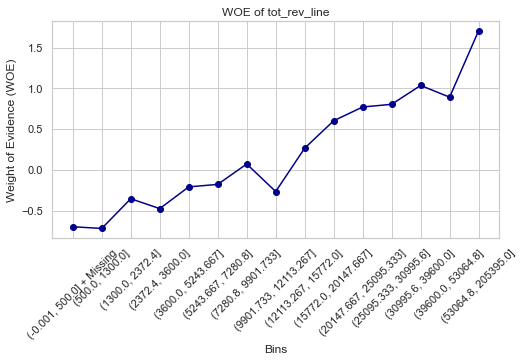

                            total    bads   goods  bad_dist  good_dist  \
(-0.001, 500.0] + Missing   839.0   286.0   553.0  0.239130   0.119155   
(500.0, 1300.0]             356.0   123.0   233.0  0.102843   0.050205   
(1300.0, 2372.4]            354.0    95.0   259.0  0.079431   0.055807   
(2372.4, 3600.0]            362.0   106.0   256.0  0.088629   0.055161   
(3600.0, 5243.667]          353.0    85.0   268.0  0.071070   0.057746   
(5243.667, 7280.8]          357.0    84.0   273.0  0.070234   0.058824   
(7280.8, 9901.733]          357.0    69.0   288.0  0.057692   0.062056   
(9901.733, 12113.267]       358.0    90.0   268.0  0.075251   0.057746   
(12113.267, 15772.0]        358.0    59.0   299.0  0.049331   0.064426   
(15772.0, 20147.667]        356.0    44.0   312.0  0.036789   0.067227   
(20147.667, 25095.333]      357.0    38.0   319.0  0.031773   0.068735   
(25095.333, 30995.6]        358.0    37.0   321.0  0.030936   0.069166   
(30995.6, 39600.0]          358.0    3

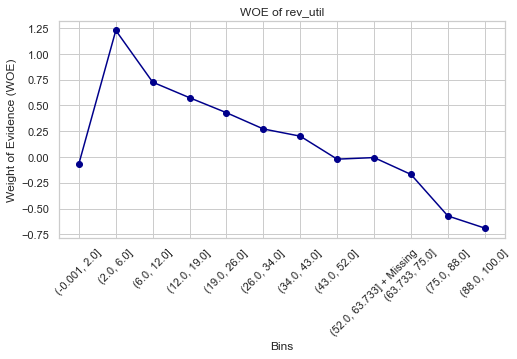

                           total    bads   goods  bad_dist  good_dist  \
(-0.001, 2.0]             1201.0   259.0   942.0  0.216555   0.202973   
(2.0, 6.0]                 385.0    27.0   358.0  0.022575   0.077139   
(6.0, 12.0]                397.0    44.0   353.0  0.036789   0.076061   
(12.0, 19.0]               387.0    49.0   338.0  0.040970   0.072829   
(19.0, 26.0]               390.0    56.0   334.0  0.046823   0.071967   
(26.0, 34.0]               390.0    64.0   326.0  0.053512   0.070243   
(34.0, 43.0]               391.0    68.0   323.0  0.056856   0.069597   
(43.0, 52.0]               360.0    75.0   285.0  0.062709   0.061409   
(52.0, 63.733] + Missing   379.0    78.0   301.0  0.065217   0.064857   
(63.733, 75.0]             402.0    94.0   308.0  0.078595   0.066365   
(75.0, 88.0]               386.0   121.0   265.0  0.101171   0.057100   
(88.0, 100.0]              769.0   261.0   508.0  0.218227   0.109459   
Total                     5837.0  1196.0  4641.0  1

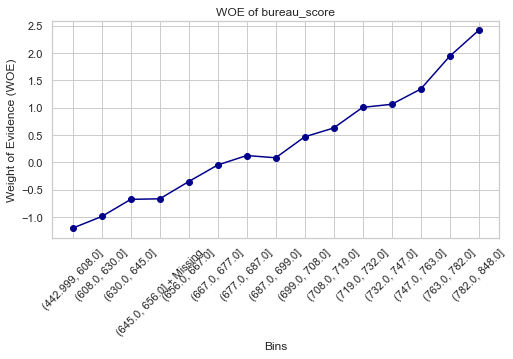

                           total    bads   goods  bad_dist  good_dist  \
(442.999, 608.0]           373.0   172.0   201.0  0.143813   0.043310   
(608.0, 630.0]             374.0   153.0   221.0  0.127926   0.047619   
(630.0, 645.0]             381.0   128.0   253.0  0.107023   0.054514   
(645.0, 656.0] + Missing   692.0   231.0   461.0  0.193144   0.099332   
(656.0, 667.0]             340.0    91.0   249.0  0.076087   0.053652   
(667.0, 677.0]             381.0    81.0   300.0  0.067726   0.064641   
(677.0, 687.0]             362.0    67.0   295.0  0.056020   0.063564   
(687.0, 699.0]             371.0    71.0   300.0  0.059365   0.064641   
(699.0, 708.0]             360.0    50.0   310.0  0.041806   0.066796   
(708.0, 719.0]             381.0    46.0   335.0  0.038462   0.072183   
(719.0, 732.0]             372.0    32.0   340.0  0.026756   0.073260   
(732.0, 747.0]             367.0    30.0   337.0  0.025084   0.072614   
(747.0, 763.0]             364.0    23.0   341.0  0

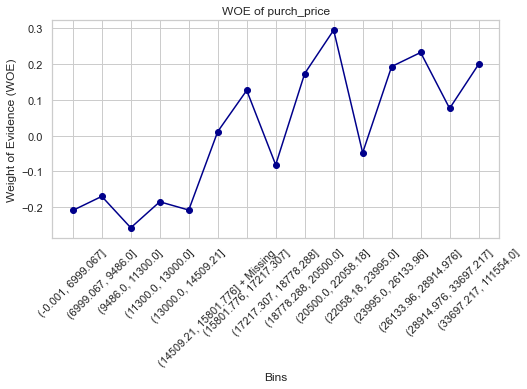

                                  total    bads   goods  bad_dist  good_dist  \
(-0.001, 6999.067]                390.0    94.0   296.0  0.078595   0.063779   
(6999.067, 9486.0]                389.0    91.0   298.0  0.076087   0.064210   
(9486.0, 11300.0]                 392.0    98.0   294.0  0.081940   0.063348   
(11300.0, 13000.0]                393.0    93.0   300.0  0.077759   0.064641   
(13000.0, 14509.21]               382.0    92.0   290.0  0.076923   0.062487   
(14509.21, 15801.776] + Missing   389.0    79.0   310.0  0.066054   0.066796   
(15801.776, 17217.307]            389.0    72.0   317.0  0.060201   0.068304   
(17217.307, 18778.288]            389.0    85.0   304.0  0.071070   0.065503   
(18778.288, 20500.0]              393.0    70.0   323.0  0.058528   0.069597   
(20500.0, 22058.18]               385.0    62.0   323.0  0.051839   0.069597   
(22058.18, 23995.0]               390.0    83.0   307.0  0.069398   0.066150   
(23995.0, 26133.96]               388.0 

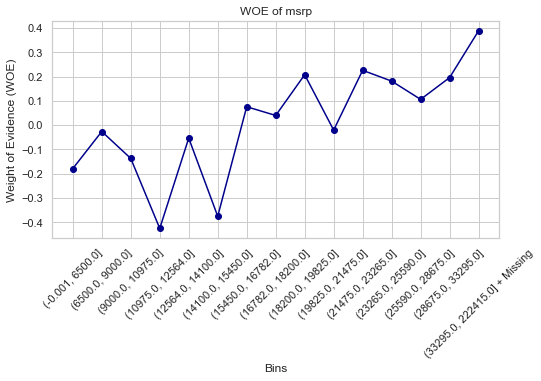

                                total    bads   goods  bad_dist  good_dist  \
(-0.001, 6500.0]                399.0    94.0   305.0  0.078595   0.065719   
(6500.0, 9000.0]                392.0    82.0   310.0  0.068562   0.066796   
(9000.0, 10975.0]               377.0    86.0   291.0  0.071906   0.062702   
(10975.0, 12564.0]              389.0   110.0   279.0  0.091973   0.060116   
(12564.0, 14100.0]              393.0    84.0   309.0  0.070234   0.066580   
(14100.0, 15450.0]              385.0   105.0   280.0  0.087793   0.060332   
(15450.0, 16782.0]              389.0    75.0   314.0  0.062709   0.067658   
(16782.0, 18200.0]              393.0    78.0   315.0  0.065217   0.067873   
(18200.0, 19825.0]              387.0    67.0   320.0  0.056020   0.068951   
(19825.0, 21475.0]              389.0    81.0   308.0  0.067726   0.066365   
(21475.0, 23265.0]              387.0    66.0   321.0  0.055184   0.069166   
(23265.0, 25590.0]              390.0    69.0   321.0  0.057692 

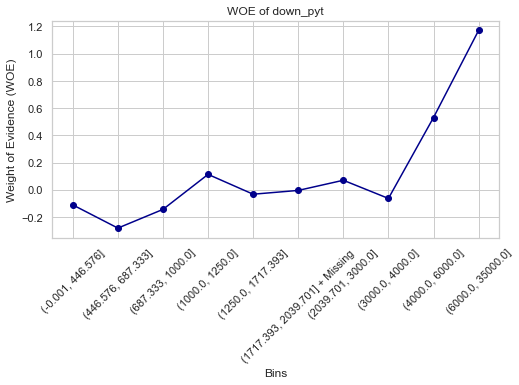

                                 total    bads   goods  bad_dist  good_dist  \
(-0.001, 446.576]               2335.0   522.0  1813.0  0.436455   0.390649   
(446.576, 687.333]               389.0    99.0   290.0  0.082776   0.062487   
(687.333, 1000.0]                641.0   147.0   494.0  0.122910   0.106443   
(1000.0, 1250.0]                 155.0    29.0   126.0  0.024247   0.027149   
(1250.0, 1717.393]               371.0    78.0   293.0  0.065217   0.063133   
(1717.393, 2039.701] + Missing   389.0    80.0   309.0  0.066890   0.066580   
(2039.701, 3000.0]               511.0    99.0   412.0  0.082776   0.088774   
(3000.0, 4000.0]                 311.0    67.0   244.0  0.056020   0.052575   
(4000.0, 6000.0]                 357.0    47.0   310.0  0.039298   0.066796   
(6000.0, 35000.0]                378.0    28.0   350.0  0.023411   0.075415   
Total                           5837.0  1196.0  4641.0  1.000000   1.000000   

                                     woe        iv 

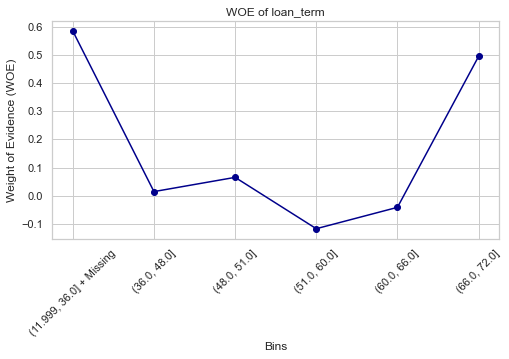

                           total    bads   goods  bad_dist  good_dist  \
(11.999, 36.0] + Missing   581.0    73.0   508.0  0.061037   0.109459   
(36.0, 48.0]               973.0   197.0   776.0  0.164716   0.167205   
(48.0, 51.0]                36.0     7.0    29.0  0.005853   0.006249   
(51.0, 60.0]              3122.0   701.0  2421.0  0.586120   0.521655   
(60.0, 66.0]               860.0   182.0   678.0  0.152174   0.146089   
(66.0, 72.0]               265.0    36.0   229.0  0.030100   0.049343   
Total                     5837.0  1196.0  4641.0  1.000000   1.000000   

                               woe        iv  diff_woe  
(11.999, 36.0] + Missing  0.584075  0.028282       NaN  
(36.0, 48.0]              0.015002  0.000037  0.569073  
(48.0, 51.0]              0.065438  0.000026  0.050437  
(51.0, 60.0]             -0.116519  0.007511  0.181958  
(60.0, 66.0]             -0.040807  0.000248  0.075713  
(66.0, 72.0]              0.494256  0.009511  0.535062  
Total           

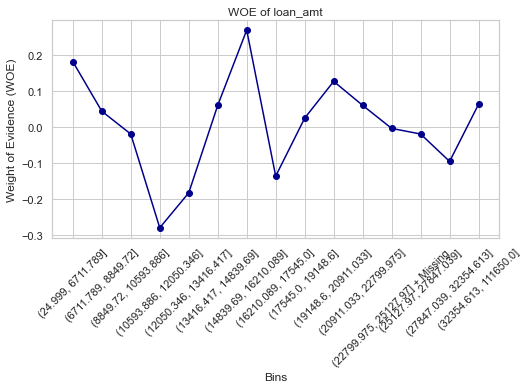

                                  total    bads   goods  bad_dist  good_dist  \
(24.999, 6711.789]                390.0    69.0   321.0  0.057692   0.069166   
(6711.789, 8849.72]               389.0    77.0   312.0  0.064381   0.067227   
(8849.72, 10593.886]              389.0    81.0   308.0  0.067726   0.066365   
(10593.886, 12050.346]            389.0    99.0   290.0  0.082776   0.062487   
(12050.346, 13416.417]            389.0    92.0   297.0  0.076923   0.063995   
(13416.417, 14839.69]             389.0    76.0   313.0  0.063545   0.067442   
(14839.69, 16210.089]             389.0    64.0   325.0  0.053512   0.070028   
(16210.089, 17545.0]              390.0    89.0   301.0  0.074415   0.064857   
(17545.0, 19148.6]                388.0    78.0   310.0  0.065217   0.066796   
(19148.6, 20911.033]              389.0    72.0   317.0  0.060201   0.068304   
(20911.033, 22799.975]            389.0    76.0   313.0  0.063545   0.067442   
(22799.975, 25127.97] + Missing   389.0 

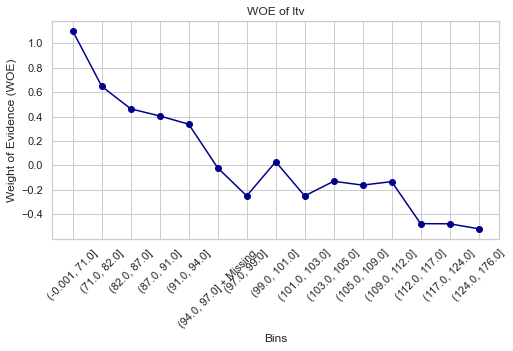

                         total    bads   goods  bad_dist  good_dist       woe  \
(-0.001, 71.0]           393.0    31.0   362.0  0.025920   0.078000  1.101710   
(71.0, 82.0]             421.0    50.0   371.0  0.041806   0.079940  0.648232   
(82.0, 87.0]             373.0    52.0   321.0  0.043478   0.069166  0.464250   
(87.0, 91.0]             464.0    68.0   396.0  0.056856   0.085326  0.405959   
(91.0, 94.0]             393.0    61.0   332.0  0.051003   0.071536  0.338314   
(94.0, 97.0] + Missing   418.0    87.0   331.0  0.072742   0.071321 -0.019737   
(97.0, 99.0]             330.0    82.0   248.0  0.068562   0.053437 -0.249238   
(99.0, 101.0]            500.0   100.0   400.0  0.083612   0.086188  0.030347   
(101.0, 103.0]           322.0    80.0   242.0  0.066890   0.052144 -0.249036   
(103.0, 105.0]           291.0    66.0   225.0  0.055184   0.048481 -0.129502   
(105.0, 109.0]           482.0   112.0   370.0  0.093645   0.079724 -0.160943   
(109.0, 112.0]           330

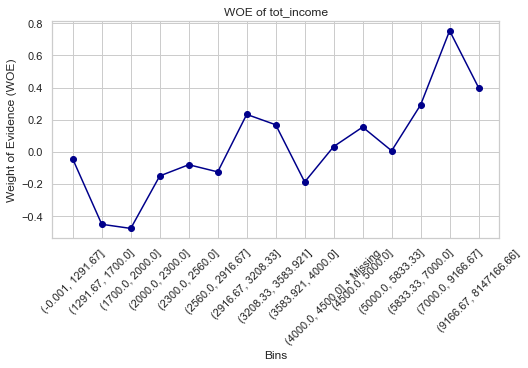

                             total    bads   goods  bad_dist  good_dist  \
(-0.001, 1291.67]            391.0    83.0   308.0  0.069398   0.066365   
(1291.67, 1700.0]            403.0   116.0   287.0  0.096990   0.061840   
(1700.0, 2000.0]             423.0   124.0   299.0  0.103679   0.064426   
(2000.0, 2300.0]             343.0    79.0   264.0  0.066054   0.056884   
(2300.0, 2560.0]             385.0    84.0   301.0  0.070234   0.064857   
(2560.0, 2916.67]            425.0    96.0   329.0  0.080268   0.070890   
(2916.67, 3208.33]           354.0    60.0   294.0  0.050167   0.063348   
(3208.33, 3583.921]          386.0    69.0   317.0  0.057692   0.068304   
(3583.921, 4000.0]           405.0    96.0   309.0  0.080268   0.066580   
(4000.0, 4500.0] + Missing   431.0    86.0   345.0  0.071906   0.074337   
(4500.0, 5000.0]             387.0    70.0   317.0  0.058528   0.068304   
(5000.0, 5833.33]            373.0    76.0   297.0  0.063545   0.063995   
(5833.33, 7000.0]        

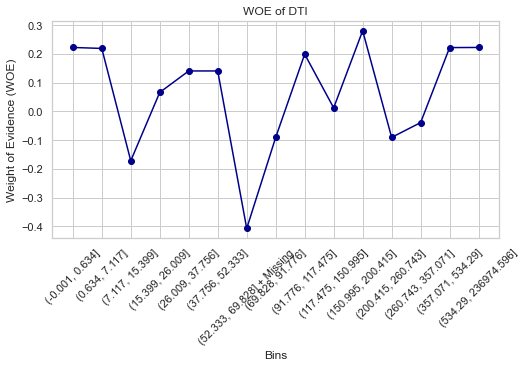

                             total    bads   goods  bad_dist  good_dist  \
(-0.001, 0.634]              351.0    60.0   291.0  0.050167   0.062702   
(0.634, 7.117]               350.0    60.0   290.0  0.050167   0.062487   
(7.117, 15.399]              350.0    82.0   268.0  0.068562   0.057746   
(15.399, 26.009]             350.0    68.0   282.0  0.056856   0.060763   
(26.009, 37.756]             350.0    64.0   286.0  0.053512   0.061625   
(37.756, 52.333]             350.0    64.0   286.0  0.053512   0.061625   
(52.333, 69.828] + Missing   935.0   261.0   674.0  0.218227   0.145227   
(69.828, 91.776]             350.0    77.0   273.0  0.064381   0.058824   
(91.776, 117.475]            350.0    61.0   289.0  0.051003   0.062271   
(117.475, 150.995]           350.0    71.0   279.0  0.059365   0.060116   
(150.995, 200.415]           350.0    57.0   293.0  0.047659   0.063133   
(200.415, 260.743]           350.0    77.0   273.0  0.064381   0.058824   
(260.743, 357.071]       

In [15]:
woe_iv_dict={}
# Apply the WOE function to each independent variable and print results
for var in independent_variable:
    print(f"\nWOE and IV values for {var}:")
    woe_iv_dict[var] = calc_woe_iv(df, var, 'bad')
    pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
    print(woe_iv_dict[var])

In [16]:
woe_iv_dict['tot_derog']

,total,bads,goods,bad_dist,good_dist,woe,iv,diff_woe
"(-0.001, 1.0]",3741.0,560.0,3181.0,0.468227,0.685413,0.381067,0.082762,NaN
"(1.0, 2.0]",478.0,121.0,357.0,0.101171,0.076923,-0.274002,0.006644,0.655069
"(2.0, 3.0]",332.0,86.0,246.0,0.071906,0.053006,-0.304963,0.005764,0.030961
"(3.0, 5.0]",439.0,159.0,280.0,0.132943,0.060332,-0.790062,0.057367,0.485099
"(5.0, 8.0]",332.0,100.0,232.0,0.083612,0.049989,-0.514380,0.017295,0.275682
"(8.0, 32.0] + Missing",515.0,170.0,345.0,0.142140,0.074337,-0.648201,0.043950,0.133821
Total,5837.0,1196.0,4641.0,1.000000,1.000000,-2.150541,0.213782,1.580632


In [17]:
independent_variable.columns

Index(['tot_derog', 'tot_tr', 'age_oldest_tr', 'tot_open_tr', 'tot_rev_tr',
       'tot_rev_debt', 'tot_rev_line', 'rev_util', 'bureau_score',
       'purch_price', 'msrp', 'down_pyt', 'loan_term', 'loan_amt', 'ltv',
       'tot_income', 'DTI'],
      dtype='object')

In [18]:
for var in woe_iv_dict.keys():
    print(var)

tot_derog
tot_tr
age_oldest_tr
tot_open_tr
tot_rev_tr
tot_rev_debt
tot_rev_line
rev_util
bureau_score
purch_price
msrp
down_pyt
loan_term
loan_amt
ltv
tot_income
DTI


In [19]:
independent_variable.columns

Index(['tot_derog', 'tot_tr', 'age_oldest_tr', 'tot_open_tr', 'tot_rev_tr',
       'tot_rev_debt', 'tot_rev_line', 'rev_util', 'bureau_score',
       'purch_price', 'msrp', 'down_pyt', 'loan_term', 'loan_amt', 'ltv',
       'tot_income', 'DTI'],
      dtype='object')

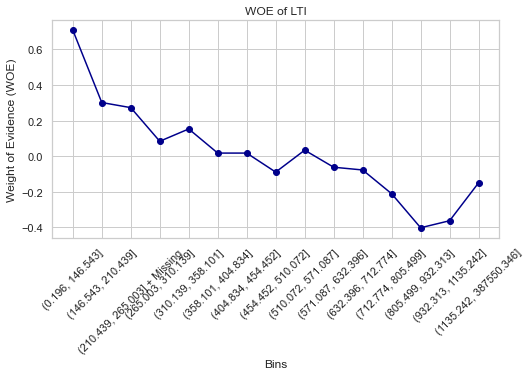

,total,bads,goods,bad_dist,good_dist,woe,iv,diff_woe
"(0.196, 146.543]",382.0,43.0,339.0,0.035953,0.073045,0.708853,0.026292,NaN
"(146.543, 210.439]",381.0,61.0,320.0,0.051003,0.068951,0.301500,0.005411,0.407353
"(210.439, 265.003] + Missing",500.0,82.0,418.0,0.068562,0.090067,0.272815,0.005867,0.028685
"(265.003, 310.139]",381.0,73.0,308.0,0.061037,0.066365,0.083693,0.000446,0.189122
"(310.139, 358.101]",381.0,69.0,312.0,0.057692,0.067227,0.152949,0.001458,0.069256
"(358.101, 404.834]",381.0,77.0,304.0,0.064381,0.065503,0.017275,0.000019,0.135674
"(404.834, 454.452]",381.0,77.0,304.0,0.064381,0.065503,0.017275,0.000019,0.000000
"(454.452, 510.072]",382.0,84.0,298.0,0.070234,0.064210,-0.089671,0.000540,0.106946
"(510.072, 571.087]",381.0,76.0,305.0,0.063545,0.065719,0.033631,0.000073,0.123302
"(571.087, 632.396]",381.0,82.0,299.0,0.068562,0.064426,-0.062223,0.000257,0.095854


In [20]:
LTI_woe=calc_woe_iv(df,'LTI','bad',15)
LTI_woe

# WOE trend of Loan amount is not intiutive and non monotonic, therefore i will drop this variable

# DISCRETE VARIABLE WOE

In [21]:
def woe_discrete(dt, discrete_variable_name, good_bad_variable_df):
    dt = pd.concat([dt[discrete_variable_name], good_bad_variable_df], axis=1)
    dt = pd.concat([dt.groupby(dt.columns.values[0], as_index=False)[dt.columns.values[1]].count(),
                    dt.groupby(dt.columns.values[0], as_index=False)[dt.columns.values[1]].mean()], axis=1)
    dt = dt.iloc[:, [0, 1, 3]]
    dt.columns = [dt.columns.values[0], 'n_obs', 'prop_good']
    dt['prop_n_obs'] = dt['n_obs'] / dt['n_obs'].sum()
    dt['n_good'] = dt['prop_good'] * dt['n_obs']
    dt['n_bad'] = (1 - dt['prop_good']) * dt['n_obs']
    dt['prop_n_good'] = dt['n_good'] / dt['n_good'].sum()
    dt['prop_n_bad'] = dt['n_bad'] / dt['n_bad'].sum()
    dt['WoE'] = np.log(dt['prop_n_good'] / dt['prop_n_bad'])
    dt = dt.sort_values(['WoE'])
    dt = dt.reset_index(drop=True)
    dt['IV'] = (dt['prop_n_good'] - dt['prop_n_bad']) * dt['WoE']
    dt['IV'] = dt['IV'].sum()
    dt['diff_WoE'] = dt['WoE'].diff().abs()
    total_row = pd.DataFrame(dt.sum()).T
    total_row.index = ['Total']
    dt = pd.concat([dt, total_row])

    return dt



In [22]:
purpose_woe = woe_discrete(df,'purpose',target_variable)
purpose_woe

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,diff_WoE
0,LOAN,3883,0.204481,0.665239,794.0,3089.0,0.66388,0.665589,-0.002572,0.000013,NaN
1,LEASE,1954,0.205732,0.334761,402.0,1552.0,0.33612,0.334411,0.0051,0.000013,0.007672
Total,LOANLEASE,5837,0.410213,1.0,1196.0,4641.0,1.0,1.0,0.002528,0.000026,0.007672


In [23]:
bankruptcy_woe = woe_discrete(df,'bankruptcy',target_variable)
bankruptcy_woe

,bankruptcy,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,diff_WoE
0,0.0,5389.0,0.202821,0.923248,1093.0,4296.0,0.91388,0.925663,-0.012811,0.001885,NaN
1,1.0,448.0,0.229911,0.076752,103.0,345.0,0.08612,0.074337,0.147132,0.001885,0.159943
Total,1.0,5837.0,0.432731,1.000000,1196.0,4641.0,1.00000,1.000000,0.134321,0.003769,0.159943


In [24]:
used_ind_woe = woe_discrete(df,'used_ind',target_variable)
used_ind_woe

,used_ind,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,IV,diff_WoE
0,0.0,2539.0,0.179598,0.434984,456.0,2083.0,0.381271,0.448826,-0.163124,0.018830,NaN
1,1.0,3298.0,0.224378,0.565016,740.0,2558.0,0.618729,0.551174,0.115616,0.018830,0.278741
Total,1.0,5837.0,0.403977,1.000000,1196.0,4641.0,1.000000,1.000000,-0.047508,0.037661,0.278741


In [25]:
independent_variable.columns

Index(['tot_derog', 'tot_tr', 'age_oldest_tr', 'tot_open_tr', 'tot_rev_tr',
       'tot_rev_debt', 'tot_rev_line', 'rev_util', 'bureau_score',
       'purch_price', 'msrp', 'down_pyt', 'loan_term', 'loan_amt', 'ltv',
       'tot_income', 'DTI'],
      dtype='object')

# IV

In [26]:
iv_variable14 = purpose_woe.loc['Total', 'IV']
iv_variable15 = bankruptcy_woe.loc['Total', 'IV']
iv_variable16 = used_ind_woe.loc['Total', 'IV']
iv_variable18 = LTI_woe.loc['Total', 'iv']

In [27]:
# Dictionary to store named dataframes
named_woe_iv_dict = {}

# Assign names to dataframes in woe_iv_dict
for idx, (var, dt) in enumerate(woe_iv_dict.items()):
    name = f'{var}'  # Example naming convention: df_1, df_2, etc.
    named_woe_iv_dict[name] = dt
    
print("Names of dataframes in woe_iv_dict:")
for var in woe_iv_dict.keys():
    
    
    print(var)

Names of dataframes in woe_iv_dict:
tot_derog
tot_tr
age_oldest_tr
tot_open_tr
tot_rev_tr
tot_rev_debt
tot_rev_line
rev_util
bureau_score
purch_price
msrp
down_pyt
loan_term
loan_amt
ltv
tot_income
DTI


In [28]:
# Create an empty dataframe to store IV values
iv_summary = pd.DataFrame(columns=['Variable', 'IV'])

# Populate the dataframe with IV values from each variable
for var, df in woe_iv_dict.items():
    iv_total = df.loc['Total', 'iv']
    iv_summary = iv_summary.append({'Variable': var, 'IV': iv_total}, ignore_index=True)

# Display the IV summary dataframe
print("IV Summary:")
iv_df = pd.DataFrame(iv_summary)
iv_summary

IV Summary:


,Variable,IV
0,tot_derog,0.213782
1,tot_tr,0.144729
2,age_oldest_tr,0.256003
3,tot_open_tr,0.024328
4,tot_rev_tr,0.041424
5,tot_rev_debt,0.080943
6,tot_rev_line,0.423609
7,rev_util,0.235068
8,bureau_score,0.800149
9,purch_price,0.032656


In [29]:
woe_iv_dict['tot_derog'].loc['Total', 'iv']

0.2137822637007211

In [30]:
df1.drop(columns=['loan_amt','bankruptcy','purpose', 'tot_open_tr','used_ind'], inplace=True)

In [31]:
df1.columns

Index(['app_id', 'tot_derog', 'tot_tr', 'age_oldest_tr', 'tot_rev_tr',
       'tot_rev_debt', 'tot_rev_line', 'rev_util', 'bureau_score',
       'purch_price', 'msrp', 'down_pyt', 'loan_term', 'ltv', 'tot_income',
       'bad', 'weight', 'DTI', 'LTI'],
      dtype='object')

# coarse classing

In [32]:
def coarse_classing(bin_summary, woe_diff_threshold=0.2):
    df = bin_summary.drop(index='Total').copy()  # Ensure we don't modify the original DataFrame and drop the 'Total' row

    while True:
        # Calculate the absolute differences in WoE between consecutive bins
        woe_diffs = df['diff_woe'].iloc[1:]

        # If all differences are above the threshold, we are done
        if np.all(woe_diffs > woe_diff_threshold):
            break

        # Find the index of the minimum difference that is less than or equal to the threshold
        min_diff_idx = woe_diffs[woe_diffs <= woe_diff_threshold].idxmin()

        # Determine which bins to merge (merge the bin with the one immediately above it)
        bin_to_merge2_idx = df.index.get_loc(min_diff_idx)
        bin_to_merge1_idx = bin_to_merge2_idx - 1
        
        bin_to_merge1 = df.index[bin_to_merge1_idx]
        bin_to_merge2 = df.index[bin_to_merge2_idx]

        # Merge the bins
        df.loc[bin_to_merge1, ['total', 'bads', 'goods']] += df.loc[bin_to_merge2, ['total', 'bads', 'goods']]

        # Drop the merged bin
        df.drop(bin_to_merge2, inplace=True)

        # Recalculate distributions and WoE for the merged bin
        total_bads = df['bads'].sum()
        total_goods = df['goods'].sum()
        df['bad_dist'] = df['bads'] / total_bads
        df['good_dist'] = df['goods'] / total_goods
        df['woe'] = np.log(df['good_dist'] / df['bad_dist'])
        df['iv'] = (df['good_dist'] - df['bad_dist']) * df['woe']

        # Update bin name to reflect the merge
        new_index = df.index.to_list()
        new_index[bin_to_merge1_idx] = f'{bin_to_merge1} + {bin_to_merge2}'
        df.index = new_index

        # Update the diff_woe column for the merged bin
        df['diff_woe'] = df['woe'].diff().abs()

    # Calculate the total IV
    total_iv = df['iv'].sum()
    
    
    plt.figure(figsize=(8, 4))
    plt.plot(df.index.astype(str),df['woe'], linestyle='-', marker='o', color='darkblue')
    plt.xlabel('Bin')
    plt.ylabel('Weight of Evidence (WOE)')
    plt.title(f'WOE after coarse classing')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # Add the 'Total' row again
    total_row = pd.DataFrame(df.sum()).T
    total_row.index = ['Total']
    df = pd.concat([df, total_row])

    return df


Applying coarse classing to tot_derog...


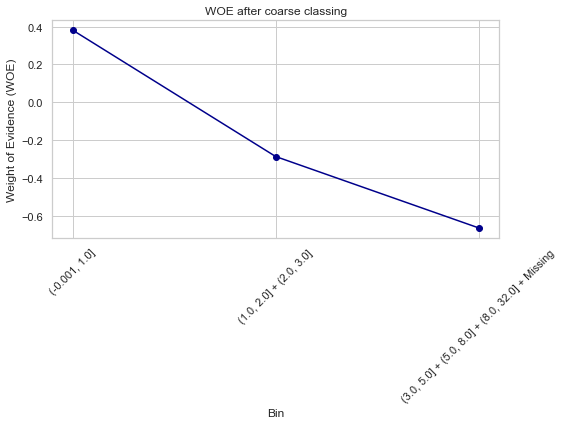


Applying coarse classing to tot_tr...


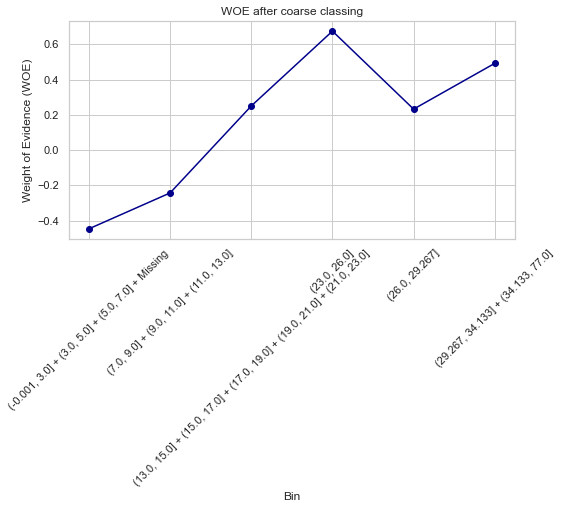


Applying coarse classing to age_oldest_tr...


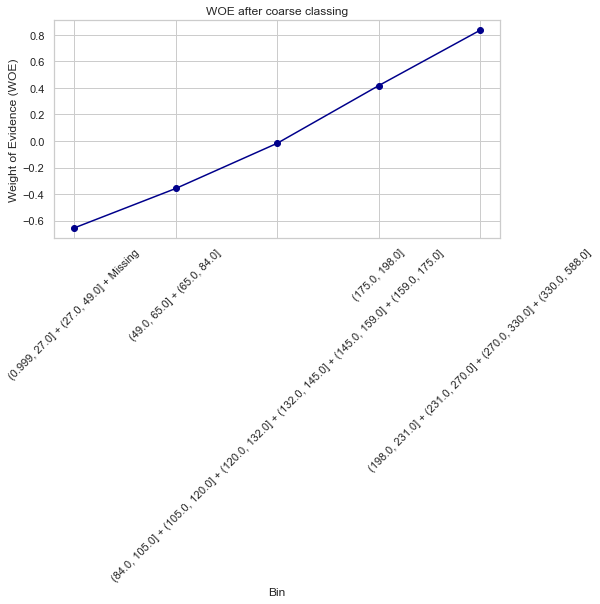


Applying coarse classing to tot_open_tr...


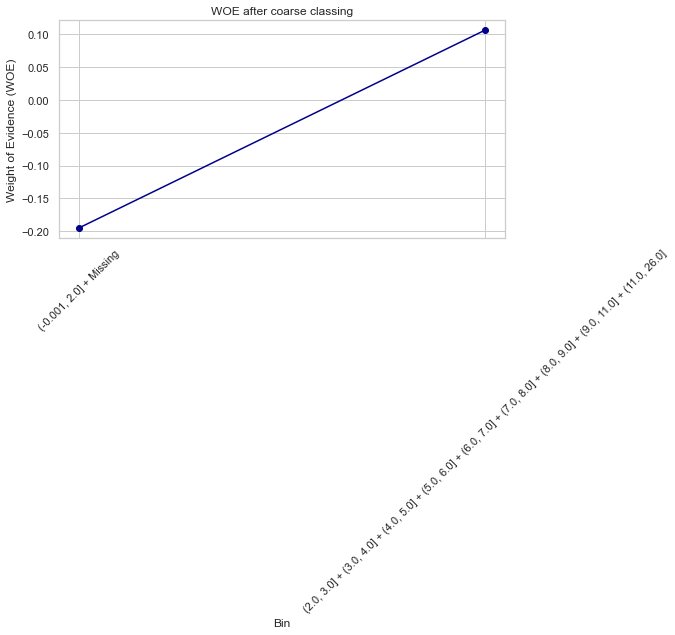


Applying coarse classing to tot_rev_tr...


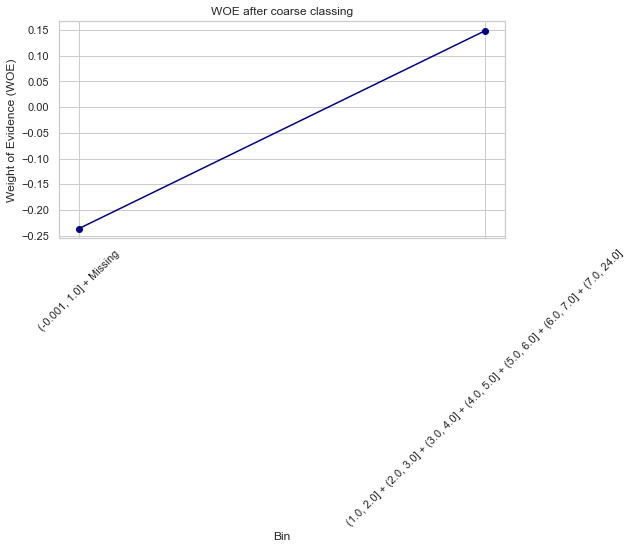


Applying coarse classing to tot_rev_debt...


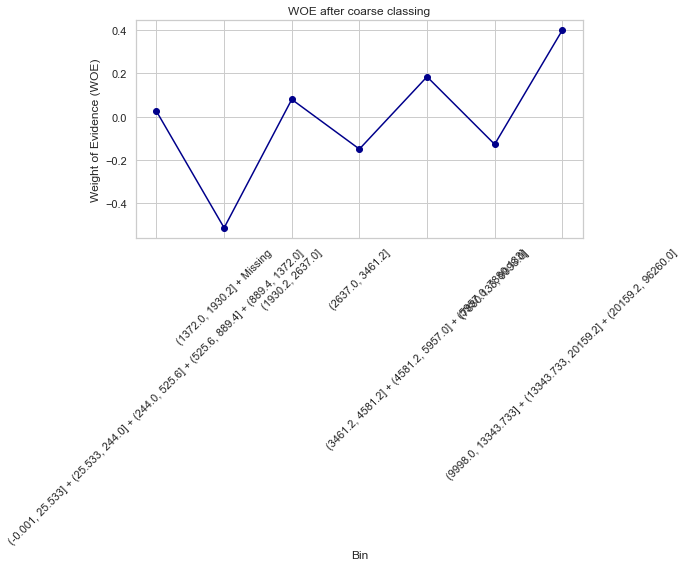


Applying coarse classing to tot_rev_line...


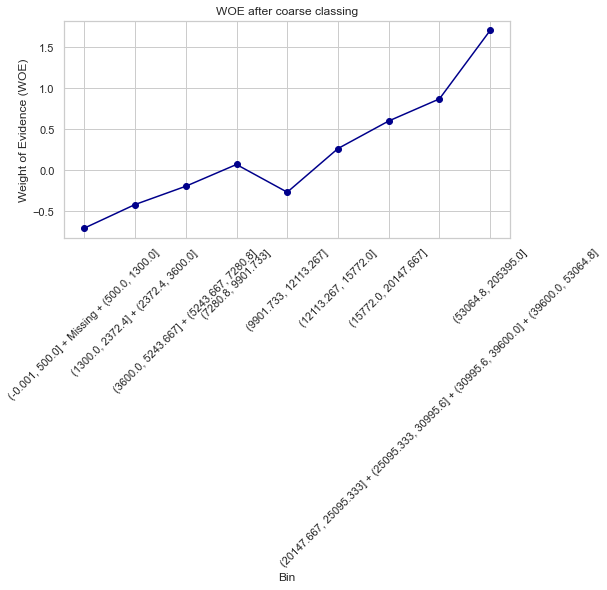


Applying coarse classing to rev_util...


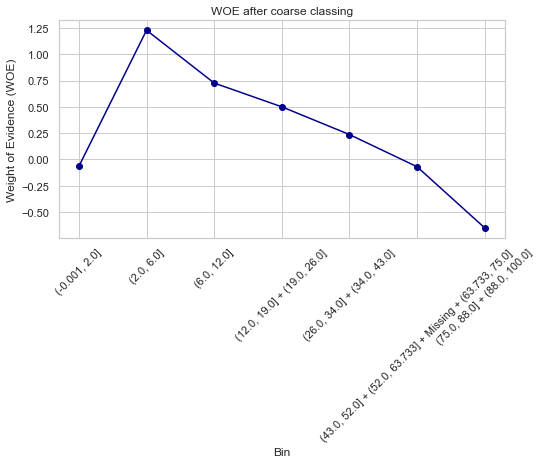


Applying coarse classing to bureau_score...


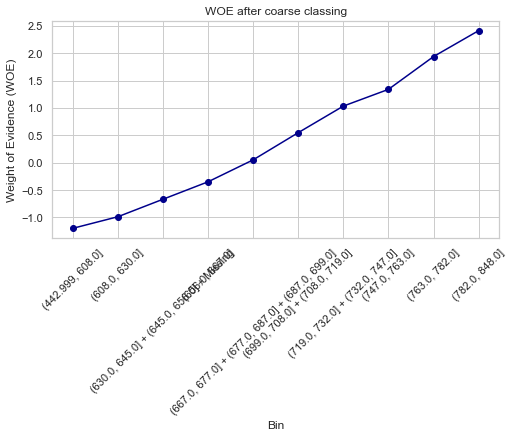


Applying coarse classing to purch_price...


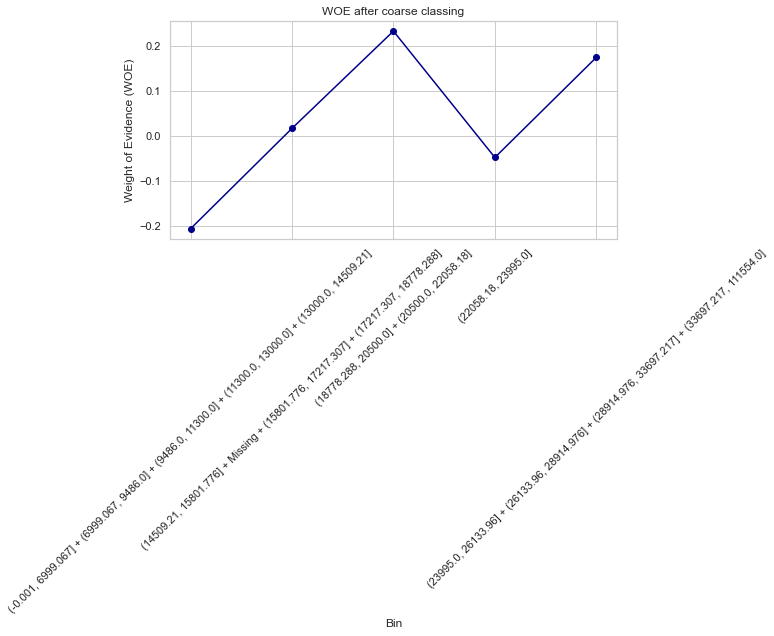


Applying coarse classing to msrp...


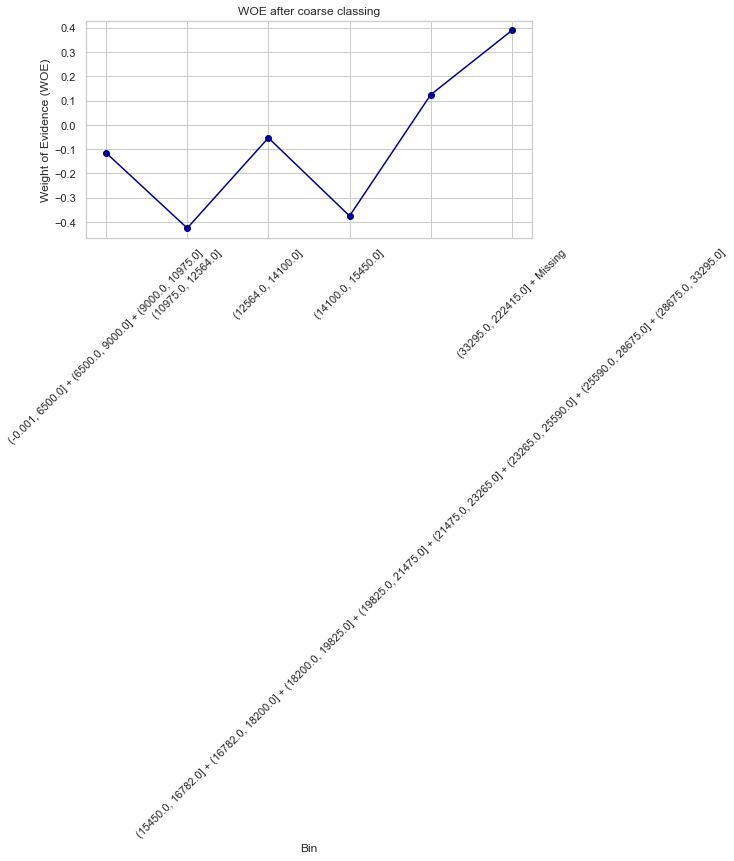


Applying coarse classing to down_pyt...


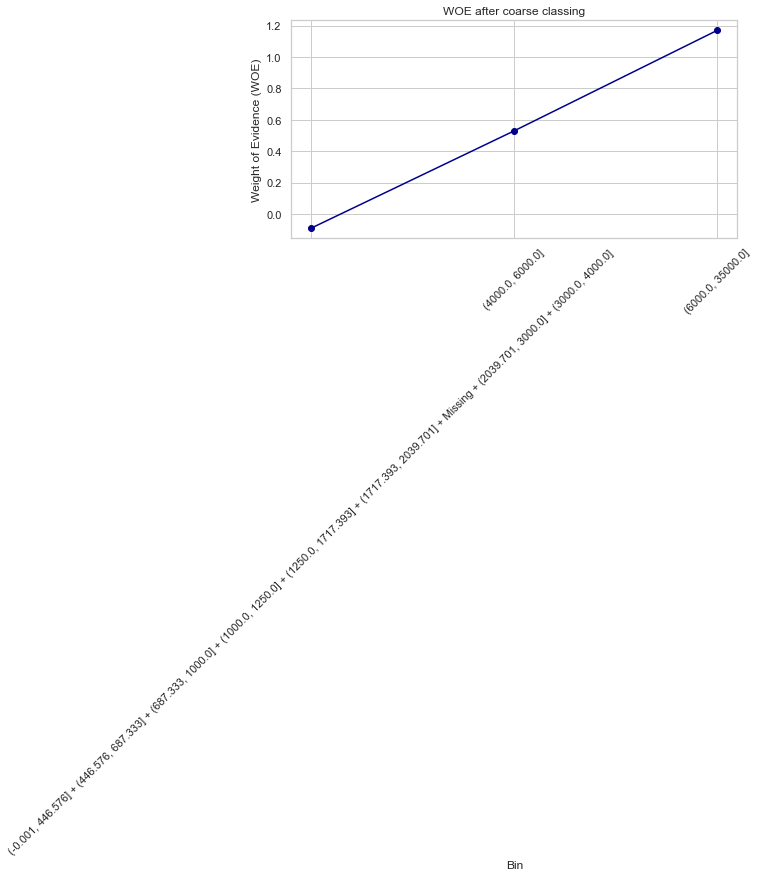


Applying coarse classing to loan_term...


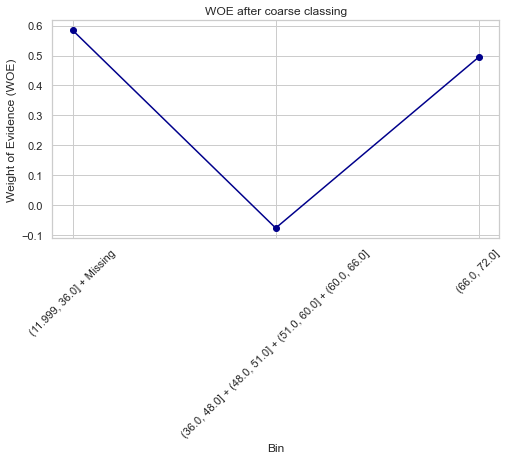


Applying coarse classing to loan_amt...


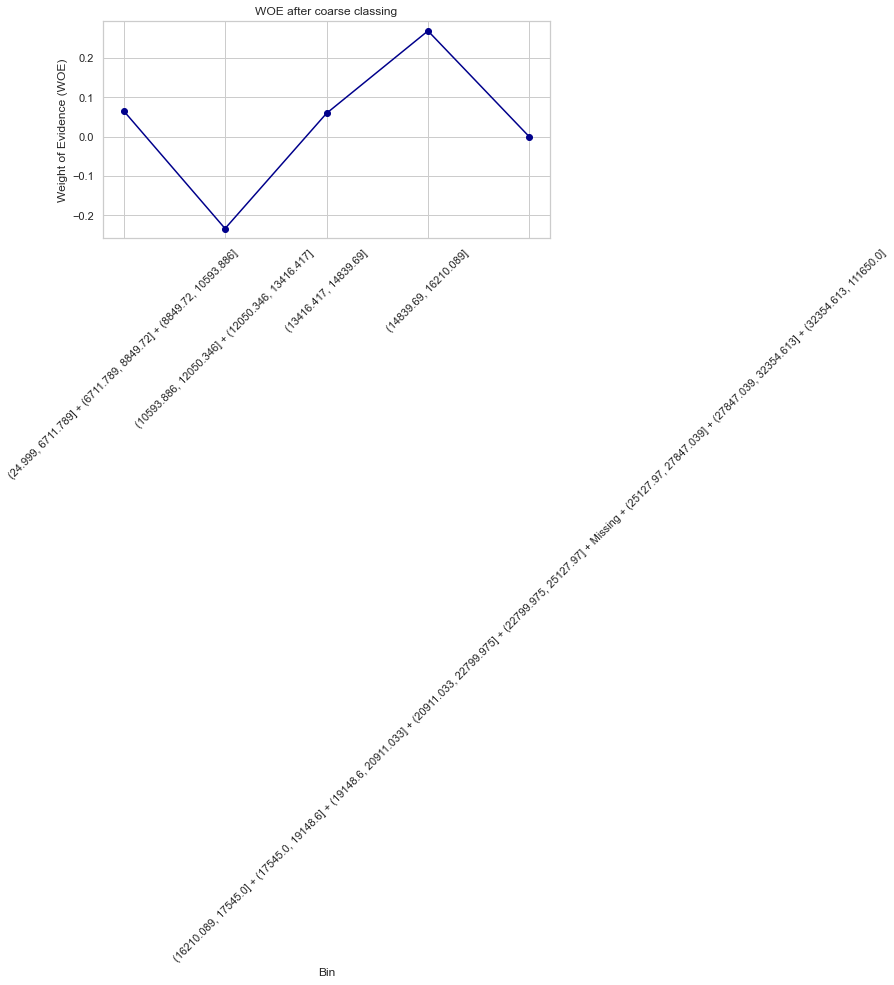


Applying coarse classing to ltv...


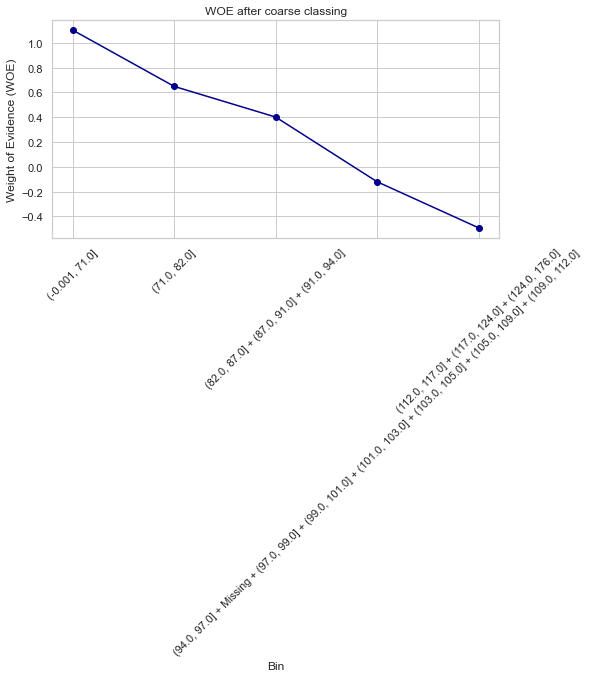


Applying coarse classing to tot_income...


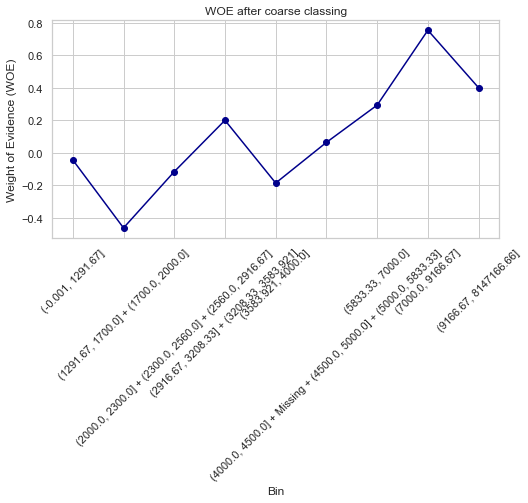


Applying coarse classing to DTI...


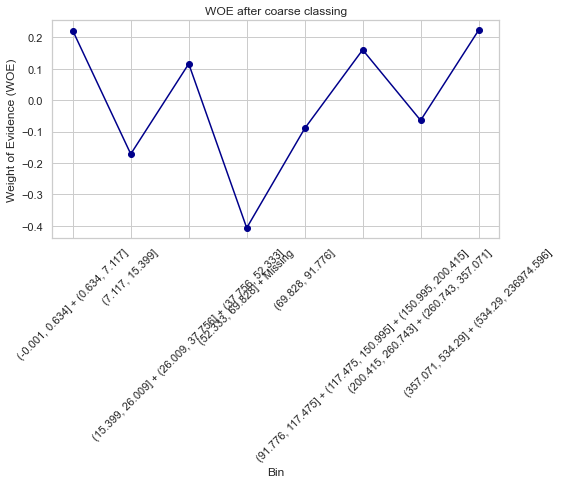


Coarse classed WOE and IV values for tot_derog:
                                                  total    bads   goods  \
(-0.001, 1.0]                                    3741.0   560.0  3181.0   
(1.0, 2.0] + (2.0, 3.0]                           810.0   207.0   603.0   
(3.0, 5.0] + (5.0, 8.0] + (8.0, 32.0] + Missing  1286.0   429.0   857.0   
Total                                            5837.0  1196.0  4641.0   

                                                 bad_dist  good_dist  \
(-0.001, 1.0]                                    0.468227   0.685413   
(1.0, 2.0] + (2.0, 3.0]                          0.173077   0.129929   
(3.0, 5.0] + (5.0, 8.0] + (8.0, 32.0] + Missing  0.358696   0.184658   
Total                                            1.000000   1.000000   

                                                      woe        iv  diff_woe  
(-0.001, 1.0]                                    0.381067  0.082762       NaN  
(1.0, 2.0] + (2.0, 3.0]                         -0.286

In [35]:
for var_name, woe_iv_df in woe_iv_dict.items():
    print(f"\nApplying coarse classing to {var_name}...")
    woe_iv_dict[var_name] = coarse_classing(woe_iv_df)

# Now you can access the modified dataframes from the dictionary
for var_name, woe_iv_df in woe_iv_dict.items():
    print(f"\nCoarse classed WOE and IV values for {var_name}:")
    pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
    print(woe_iv_df)